# TE Academy Reputation-Weighted Voting 

## Voting Mechanism Experiment 

## Experiment #1-A: Basic Feasibility of Weights

## Experiment Overview

### Key Question

Does the initial manually tuned setting of weights satisfy the key requirements laid out for it? 

## Code for Simulation

## Setup, Part 1
### Voting Mechanism Choice

We need to design on a mechanism that we want to use, and import it. 
The mechanism needs to be in the `mechanisms` module. 


### Part 1, Step 1:  Explanation of Mechanism


We load the `PercentageAllocationWeightedPlurality` mechanism.

This mechanism 
1. uses weights (point totals) defined for each user
2. has each user assign percentage value to each candidate, such that values total to 1.0.
3. allocates to each candidate the proportion of the user's weight indicated by their percentage.
4. winning candidate is the one with the most weight. 



**Example:**
1. Voter 1 is assigned a weight of 8 points. 
2. Voter 1 assigns the following percentages:
```python
ballot = {"candidate_A": 0.6,
          "candidate_B": 0.3,
          "candidate_C": 0.1}
```
3. After processing this ballot, 
* `candidate_A`'s vote total will increase by 0.6 * 8 = 4.8 votes
* `candidate_B`'s vote total will increase by 0.3 * 8 = 2.4 votes
* `candidate_C`'s vote total will increase by 0.1 * 8 = 0.8 votes

If Voter 1 was the only voter, `candidate_A` would win. If there are more Voters, we will continue processing Vote results in this way. 

### Part 1, Step 2: Actual Code Import Statements

We import several things that the code needs to do. 

In [1]:
# Standard Imports
import math

import numpy as np
import pandas as pd
import os
import random
from typing import Dict

import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # Add this line to include the directory above

# Import Mechanism
from mechanisms.percentage_allocation_weighted_plurality import PercentageAllocationWeightedPlurality

## Setup Part 2: Importing the User NFT Data

In the cell below, we read data from a .csv file about which users have which NFTs. 
Creating the .csv file will need to be done elsewhere.

**TODO:** Put an up-to-date GraphQL pull elsewhere, so data can be updated from the notebook.

In [2]:
file_name = "../data/2024-06-10_NFT_balances.csv"
file_exists = os.path.exists(file_name)
file_exists

True

In [3]:
# Read the CSV file
user_data = pd.read_csv(file_name)

# Set the index of the DataFrame to be Id
user_data.set_index('Id', inplace=True)

# Convert the user_data DataFrame to a nested dictionary
user_data_dict = user_data.to_dict(orient='index')

## Setup **Part 3**: Defining NFT Information

### Part 3, Step 1: Defining NFT Weights


**Option (a):** Defining NFT Weights Manually.

Each NFT weight can be set as part of a dictionary. If you choose to do this, please note that you will need to delete (or comment out) the parts below that read NFT weights as a .csv file. 

In [4]:
default_weights_dict = {
    "tokenId 1": 7,   # Token ID 1
    "tokenId 2": 7,   # Token ID 2
    "tokenId 3": 7,   # Token ID 3
    "tokenId 4": 7,   # Token ID 4
    "tokenId 5": 7,   # Token ID 5
    "tokenId 6": 7,   # Token ID 6
    "tokenId 7": 7,   # Token ID 7
    "tokenId 8": 7,   # Token ID 8
    "tokenId 9": 7,   # Token ID 9
    "tokenId 10": 7,  # Token ID 10
    "tokenId 11": 20, # Token ID 11
    "tokenId 12": 10, # Token ID 12
    "tokenId 13": 10, # Token ID 13
    "tokenId 14": 10, # Token ID 14
    "tokenId 15": 16, # Token ID 15
    "tokenId 16": 1,  # Token ID 16
    "tokenId 17": 16, # Token ID 17
    "tokenId 18": 5,  # Token ID 18
    "tokenId 19": 1,  # Token ID 19
    "tokenId 20": 3,  # Token ID 20
    "tokenId 21": 3,  # Token ID 21
    "tokenId 22": 1,  # Token ID 22
    "tokenId 23": 10, # Token ID 23
    "tokenId 24": 10, # Token ID 24
    "tokenId 25": 10, # Token ID 25
    "tokenId 26": 10, # Token ID 26
    "tokenId 27": 10, # Token ID 27
    "tokenId 28": 10, # Token ID 28
    "tokenId 29": 10, # Token ID 29
    "tokenId 30": 10, # Token ID 30
    "tokenId 31": 16, # Token ID 31
    "tokenId 32": 16, # Token ID 32
    "tokenId 33": 16, # Token ID 33
    "tokenId 34": 16, # Token ID 34
    "tokenId 35": 16, # Token ID 35
    "tokenId 36": 16, # Token ID 36
    "tokenId 37": 16, # Token ID 37
    "tokenId 38": 16, # Token ID 38
    "tokenId 39": 18, # Token ID 39
    "tokenId 40": 5,  # Token ID 40
    "tokenId 41": 16, # Token ID 41
    "tokenId 42": 16, # Token ID 42
    "tokenId 43": 1,  # Token ID 43
    "tokenId 44": 10  # Token ID 44
}


## Setup, Part 3
### Step 1, Option (b): Reading NFT Weights from a .csv File

It's also possible to load the above weights as a default .csv file, but we will skip that for now. 

This remains a **TODO**. 

## Setup, Part 3: Defining NFT Information

### Step 2: Giving Additional NFT Group Information

We also divide NFT information into which Tokens belong to ```experts```, and which belong to ```students```.

In [5]:
expert_token_Ids = [11, 15, 17, 31, 32, 33, 34, 35, 36, 37, 38, 39]
graduates_tokenIds = [1,2,3,4,5,6,7,8,9,10]
student_tokenIds = [12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

## Setup, Part 4: Setting Additional Information

There are certain weighting options where it may be interesting to either assign or analyze voter information, based on additional knowledge about the NFTs. 

This information may include: 
1. How many of each NFT there are.
2. How each NFT is characterized: "student", "graduate", or "expert". 

### Part 4, Step 1: Counting The Total Number of Each NFT

We count and visualize the number of each NFT. 



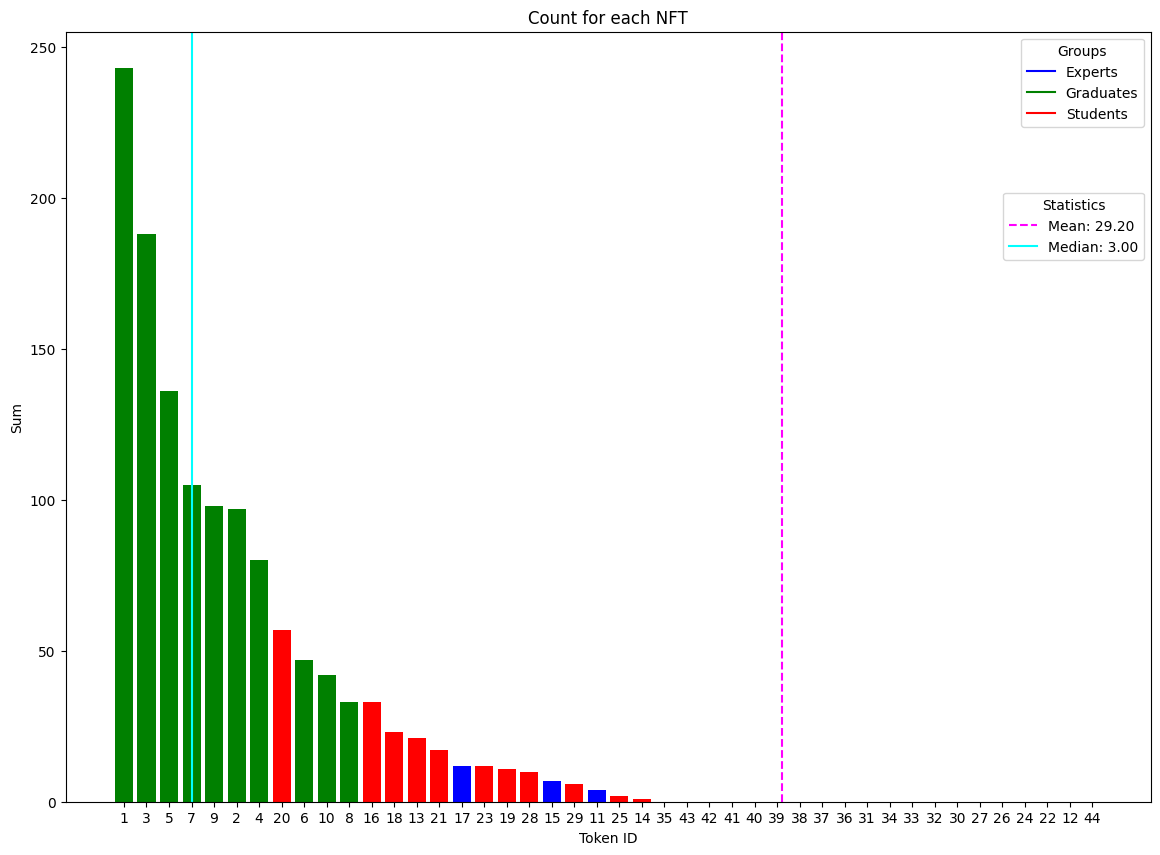

In [6]:
column_sums = user_data.sum(axis=0)

# Create a sorted bar chart
sorted_sums = column_sums.sort_values(ascending=False)
plt.figure(figsize=(14, 10))

# Define colors for each group
colors = []
for token_id in sorted_sums.index.str.replace('tokenId ', ''):
    if int(token_id) in expert_token_Ids:
        colors.append('blue')  # Color for experts
    elif int(token_id) in graduates_tokenIds:
        colors.append('green')  # Color for graduates
    elif int(token_id) in student_tokenIds:
        colors.append('red')  # Color for students
    else:
        colors.append('gray')  # Color for undefined groups

plt.bar(sorted_sums.index.str.replace('tokenId ', ''), sorted_sums.values, color=colors)
plt.xlabel('Token ID')
plt.ylabel('Sum')
plt.title('Count for each NFT')

# Calculate mean and median
mean_value = sorted_sums.mean()
median_value = sorted_sums.median()

# Add vertical lines for mean and median
plt.axvline(x=mean_value, color='magenta', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='cyan', linestyle='-', label=f'Median: {median_value:.2f}')

# Add legend for groups and statistics
# `bbox_to_anchor` is used to place the legend at a specific position. 
# The tuple (1, 1) places the legend at the upper right corner of the plot.
group_legend = plt.legend([plt.Line2D([0], [0], color='blue'), plt.Line2D([0], [0], color='green'), plt.Line2D([0], [0], color='red')], 
                          ['Experts', 'Graduates', 'Students'], title="Groups", loc='upper right', bbox_to_anchor=(1, 1))
plt.gca().add_artist(group_legend)

# Here, `bbox_to_anchor` is set to (1, 0.85), which places the legend slightly below the upper right corner.
plt.legend([plt.Line2D([0], [0], color='magenta', linestyle='--'), plt.Line2D([0], [0], color='cyan', linestyle='-')], 
           [f'Mean: {mean_value:.2f}', f'Median: {median_value:.2f}'], title="Statistics", loc='upper right', bbox_to_anchor=(1, 0.8))
plt.show()

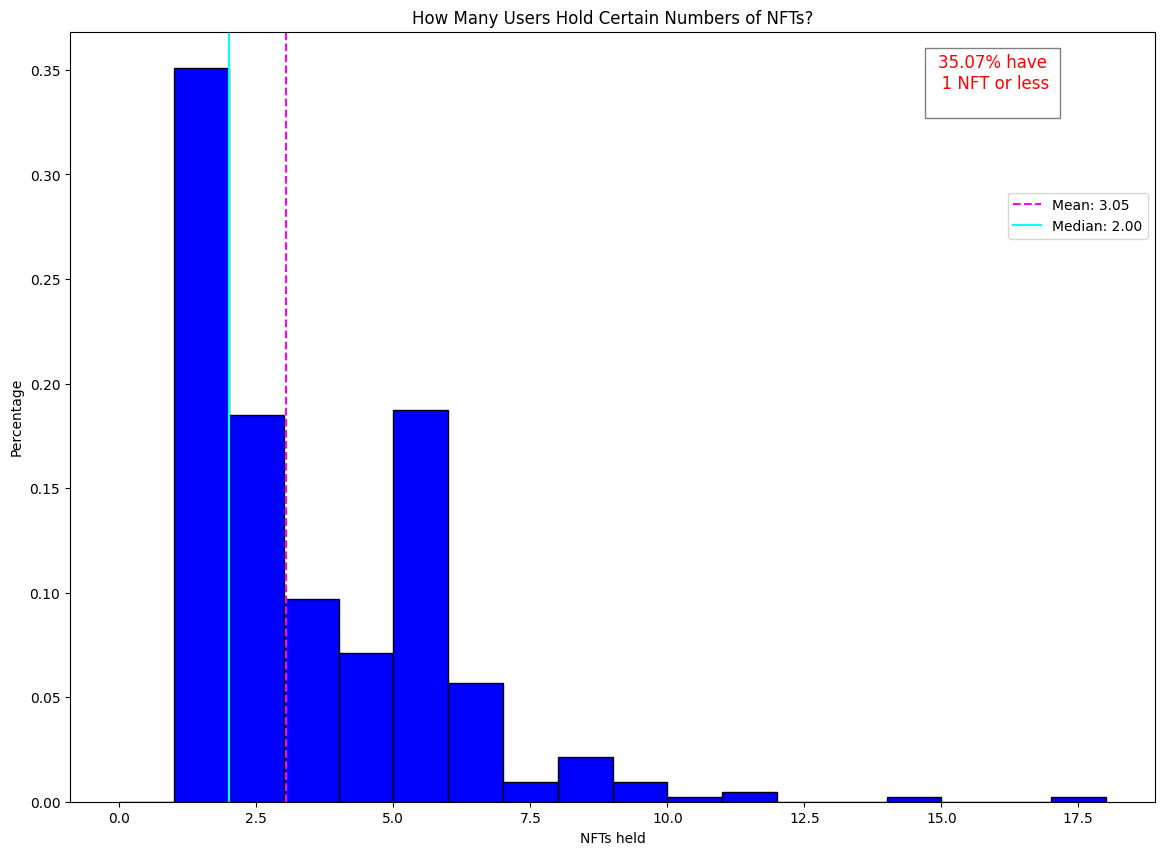

In [7]:
# Assuming `user_data` is the DataFrame you want to sum the rows of for each user
user_sums = user_data.sum(axis=1)

# Create a sorted bar chart
sorted_user_sums = user_sums.sort_values(ascending=False)
plt.figure(figsize=(14, 10))

# Calculate the range for bins
bin_range = (0, sorted_user_sums.max())
bins = np.arange(bin_range[0], bin_range[1] + 2, 1)  # +2 to include the last bin edge

# Plot histogram with heights as percentages
histogram = plt.hist(sorted_user_sums, bins=bins, color='blue', edgecolor='black', weights=np.ones_like(sorted_user_sums) / len(sorted_user_sums))
plt.xlabel('NFTs held')
plt.ylabel('Percentage')
plt.title('How Many Users Hold Certain Numbers of NFTs?')

# Calculate the percentage of users holding 1 NFT or less
one_nft_or_less = np.sum(sorted_user_sums <= 1) / len(sorted_user_sums) * 100

plt.gca().text(0.85, 0.9, f"{one_nft_or_less:.2f}% have\n  1 NFT or less \n", 
              transform=plt.gca().transAxes, fontsize=12, color='red', 
              horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# Calculate mean and median
mean_value = sorted_user_sums.mean()
median_value = sorted_user_sums.median()

# Add horizontal lines for mean and median
plt.axvline(x=mean_value, color='magenta', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='cyan', linestyle='-', label=f'Median: {median_value:.2f}')

plt.legend(loc='upper right', bbox_to_anchor=(1, 0.8))

plt.show()

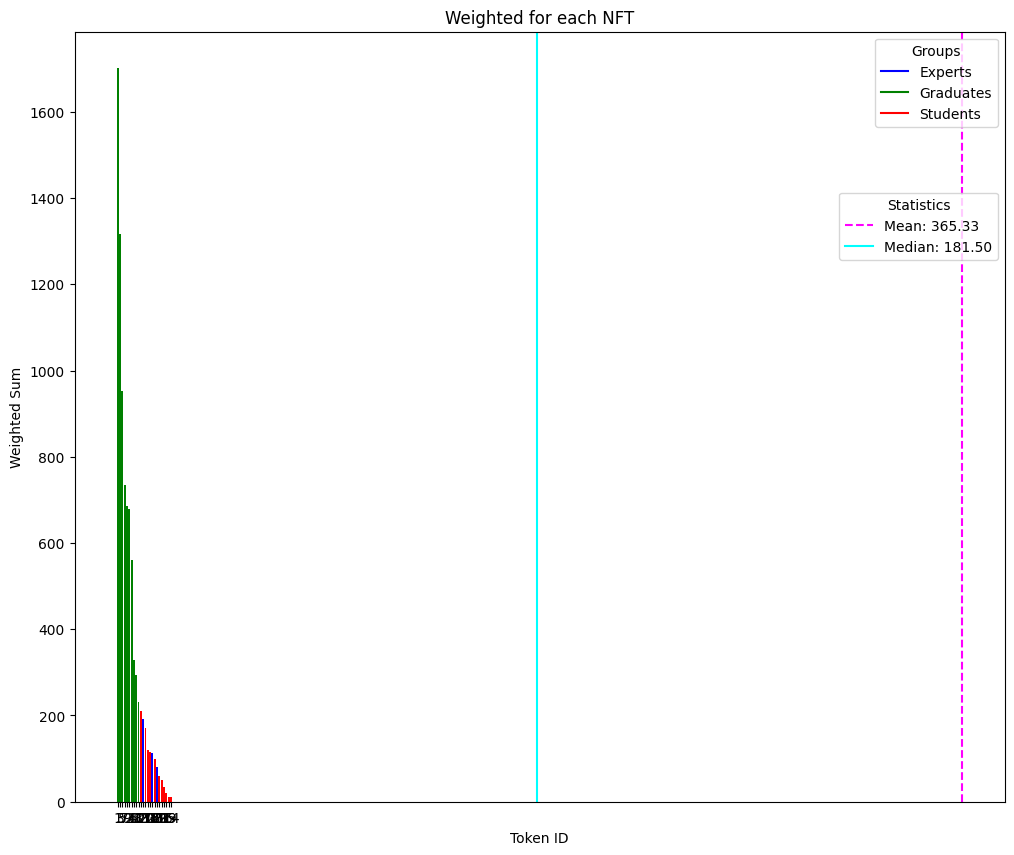

In [8]:
column_sums_dict = column_sums.to_dict()
weighted_sums_dict = {token_id: sum * default_weights_dict.get(token_id, 0) 
                      for token_id, sum 
                      in column_sums_dict.items() if sum * default_weights_dict.get(token_id, 0) > 0}
weighted_sums_series = pd.Series(weighted_sums_dict)
weighted_sums_series = weighted_sums_series.sort_values(ascending=False)
plt.figure(figsize=(12, 10))  # Assuming a reasonable width of 12 inches
# Define colors for each group
colors = []
for token_id in weighted_sums_series.index.str.replace('tokenId ', ''):
    if int(token_id) in expert_token_Ids:
        colors.append('blue')  # Color for experts
    elif int(token_id) in graduates_tokenIds:
        colors.append('green')  # Color for graduates
    elif int(token_id) in student_tokenIds:
        colors.append('red')  # Color for students
    else:
        colors.append('gray')  # Color for undefined groups

# Calculate the weighted sum for each NFT
plt.bar(weighted_sums_series.index.str.replace('tokenId ', ''), weighted_sums_series.values, color=colors)
plt.xlabel('Token ID')
plt.ylabel('Weighted Sum')
plt.title('Weighted for each NFT')

# Calculate mean and median for weighted sums
mean_value = weighted_sums_series.mean()
median_value = weighted_sums_series.median()

# Add vertical lines for mean and median
plt.axvline(x=mean_value, color='magenta', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='cyan', linestyle='-', label=f'Median: {median_value:.2f}')

# Add legend for groups and statistics
# `bbox_to_anchor` is used to place the legend at a specific position. 
# The tuple (1, 1) places the legend at the upper right corner of the plot.
group_legend = plt.legend([plt.Line2D([0], [0], color='blue'), plt.Line2D([0], [0], color='green'), plt.Line2D([0], [0], color='red')], 
                          ['Experts', 'Graduates', 'Students'], title="Groups", loc='upper right', bbox_to_anchor=(1, 1))
plt.gca().add_artist(group_legend)

# Here, `bbox_to_anchor` is set to (1, 0.85), which places the legend slightly below the upper right corner.
plt.legend([plt.Line2D([0], [0], color='magenta', linestyle='--'), plt.Line2D([0], [0], color='cyan', linestyle='-')], 
           [f'Mean: {mean_value:.2f}', f'Median: {median_value:.2f}'], title="Statistics", loc='upper right', bbox_to_anchor=(1, 0.8))
plt.show()

In [9]:
from IPython.display import HTML, display

top_ten_entries = weighted_sums_series.nlargest(10).to_frame(name='Weight')
bottom_ten_entries = weighted_sums_series.nsmallest(10).sort_values(ascending=False).to_frame(name='Weight')

# Add a new column to indicate the group
top_ten_entries['Group'] = top_ten_entries.index.str.replace('tokenId ', '').map(lambda x: 'Expert' if int(x) in expert_token_Ids else 'Graduate' if int(x) in graduates_tokenIds else 'Student' if int(x) in student_tokenIds else 'Undefined')
bottom_ten_entries['Group'] = bottom_ten_entries.index.str.replace('tokenId ', '').map(lambda x: 'Expert' if int(x) in expert_token_Ids else 'Graduate' if int(x) in graduates_tokenIds else 'Student' if int(x) in student_tokenIds else 'Undefined')

html_table_top = top_ten_entries.to_html(index=True)
html_table_bottom = bottom_ten_entries.to_html(index=True)
display(HTML("<h2>Top 10 NFTs by Weight:</h2><table style='float:left'>{}</table></br><h2>Bottom 10 NFTs by Weight:</h2><table style='float:left'>{}</table>".format(html_table_top, html_table_bottom)))


,Weight,Group
tokenId 1,1701,Graduate
tokenId 3,1316,Graduate
tokenId 5,952,Graduate
tokenId 7,735,Graduate
tokenId 9,686,Graduate
tokenId 2,679,Graduate
tokenId 4,560,Graduate
tokenId 6,329,Graduate
tokenId 10,294,Graduate
tokenId 8,231,Graduate


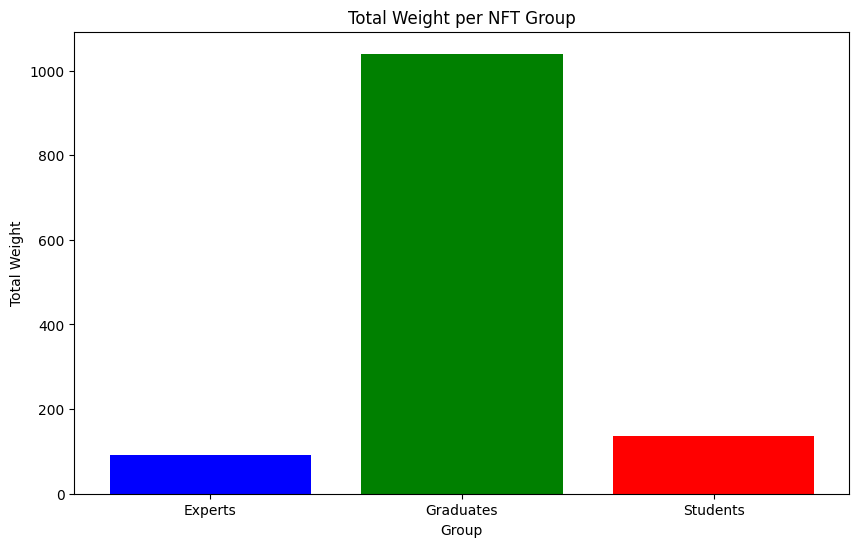

In [10]:
# Calculate the total weight per group
expert_weight = column_sums[sorted_sums.index.str.replace('tokenId ', '').map(lambda x: int(x) in expert_token_Ids)].sum()
graduate_weight = column_sums[sorted_sums.index.str.replace('tokenId ', '').map(lambda x: int(x) in graduates_tokenIds)].sum()
student_weight = column_sums[sorted_sums.index.str.replace('tokenId ', '').map(lambda x: int(x) in student_tokenIds)].sum()

# Create a simple three-color bar chart
plt.figure(figsize=(10, 6))
plt.bar(['Experts', 'Graduates', 'Students'], [expert_weight, graduate_weight, student_weight], color=['blue', 'green', 'red'])
plt.xlabel('Group')
plt.ylabel('Total Weight')
plt.title('Total Weight per NFT Group')
plt.show()


## Setup, Step 5: Setting Voter Weights Based On NFT Weights

Each voter needs their **own individual weight/points** based on the given information of which NFTs voters hold, and how much each NFT should count. 

In [11]:
voter_weights_dict = {}

for user, row in user_data.iterrows():
    weighted_sum = sum(row[col] * default_weights_dict.get(col, 0) for col in row.index)
    voter_weights_dict[user] = {"weight": weighted_sum}


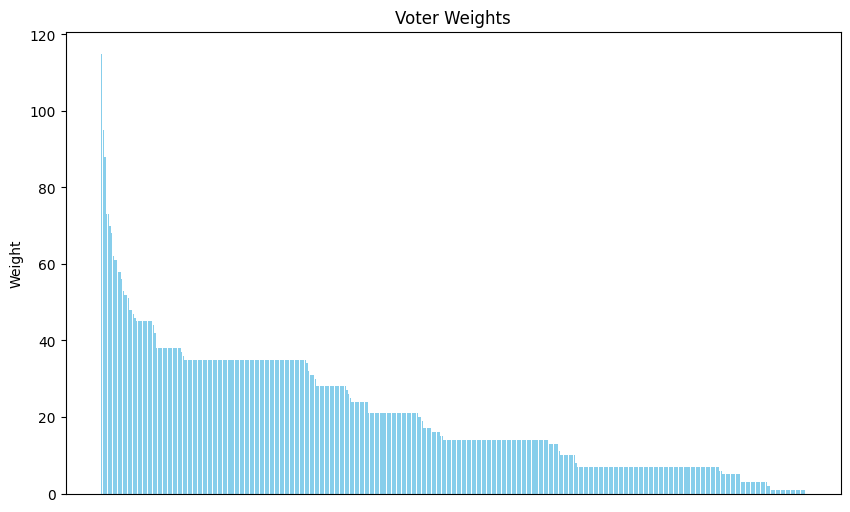

In [12]:
import matplotlib.pyplot as plt

sorted_voter_weights = sorted(voter_weights_dict.items(), key=lambda x: x[1]['weight'], reverse=True)
voter_names = [voter[0] for voter in sorted_voter_weights]
voter_weights = [voter[1]['weight'] for voter in sorted_voter_weights]

plt.figure(figsize=(10, 6))
plt.bar(voter_names, voter_weights, color='skyblue')
plt.ylabel('Weight')
plt.title('Voter Weights')
plt.xticks([])  # Suppress the xticks
plt.show()


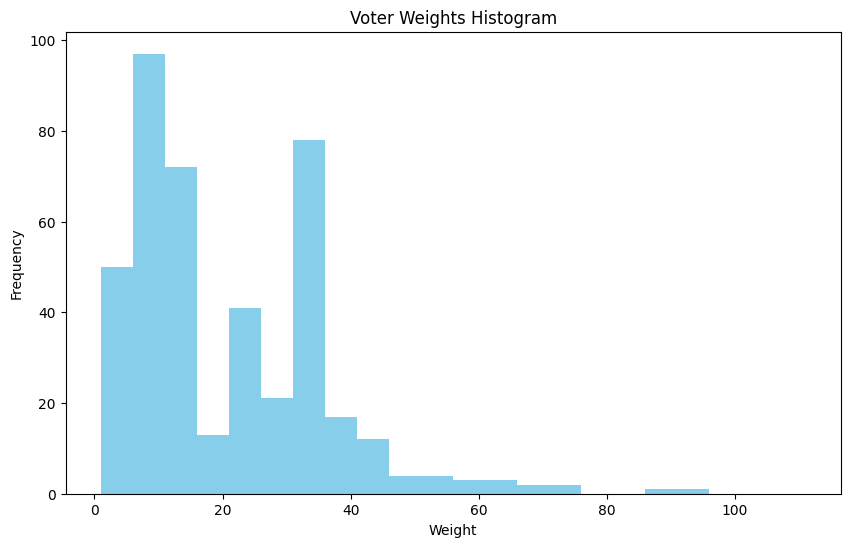

In [13]:
import matplotlib.pyplot as plt

sorted_voter_weights = sorted(voter_weights_dict.items(), key=lambda x: x[1]['weight'], reverse=True)
voter_weights = [voter[1]['weight'] for voter in sorted_voter_weights]

min_weight = min(voter_weights)
max_weight = max(voter_weights)
bin_width = 5
bins = [min_weight + i * bin_width for i in range((max_weight - min_weight) // bin_width + 1)]

plt.figure(figsize=(10, 6))
plt.hist(voter_weights, bins=bins, color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Voter Weights Histogram')
plt.show()


In [14]:
from collections import Counter

sorted_voter_weights = sorted(voter_weights_dict.items(), key=lambda x: x[1]['weight'], reverse=True)
weight_counts = Counter(voter[1]['weight'] for voter in sorted_voter_weights)

from IPython.display import HTML, display
display(HTML("<h2>Voter Weight Frequencies</h2>"))
display(HTML("<table><tr><th>Weight</th><th>Frequency</th></tr>" + 
             "".join(f"<tr><td>{weight}</td><td>{count}</td></tr>" for weight, count in weight_counts.most_common()) + 
             "</table>"))


Weight,Frequency
7,85
35,73
14,63
21,30
1,21
28,18
3,16
38,15
5,11
45,10


In [15]:
from collections import Counter

sorted_voter_weights = sorted(voter_weights_dict.items(), key=lambda x: x[1]['weight'], reverse=True)
weight_counts = sorted(Counter(voter[1]['weight'] for voter in sorted_voter_weights).items(), key=lambda x: x[0], reverse=True)

from IPython.display import HTML, display
display(HTML("<h2>Voter Weight Frequencies</h2>"))
display(HTML("<table><tr><th>Weight</th><th>Frequency</th></tr>" + 
             "".join(f"<tr><td>{weight}</td><td>{count}</td></tr>" for weight, count in weight_counts) + 
             "</table>"))

Weight,Frequency
115,1
95,1
88,1
73,2
70,1
68,1
62,1
61,2
58,2
56,1


## Next: Scenario Analyses

### Helper Functions

These help create specific scenarios that can then be extended to examine what happens. 

In [16]:
def generate_random_voter_turnout(voters, percentage: float):
    num_voters_to_sample = int(len(voters) * percentage)
    sampled_voters = random.sample(sorted(voters), num_voters_to_sample)
    sampled_voters_dict = {voter: voters[voter] for voter in sampled_voters}
    return sampled_voters_dict
    

In [17]:
generate_random_voter_turnout(voter_weights_dict, 0.01)

{'0x1c651c3fedbf95307fb7a3a2fc07bc1e0753e5a9': {'weight': 35},
 '0x6c02ff3a875c1eed933860a9adff4288d41f5dd3': {'weight': 28},
 '0xa775c775feb740d15da78d572a1caccbccc7a0f6': {'weight': 14},
 '0x85524e962b11cb82ea7baf3a00ceff92c6368db2': {'weight': 35}}

Add up all the voter weights in a voter weights dictionary. 

In [18]:
def sum_voter_weights(input_voter_weights_dict):
    # Add all the weights in a given voter weights dictionary. 
    return sum(voter['weight'] for voter in input_voter_weights_dict.values())

In [19]:
def generate_random_voter_choices(voters, candidates):
    """
    Generates a dictionary of voter choices, where each voter's choices are a random distribution over the candidates.
    
    Parameters:
    voters (list): A list of voter IDs
    candidates (list): A list of candidate IDs
    
    Returns:
    dict: A dictionary where each key is a voter ID and the value is a dictionary of candidate IDs to random weights
    """
    voter_choices = {voter_id: {candidate: random.random() for candidate in candidates} for voter_id in voters}
    for voter_id in voter_choices:
        total = sum(voter_choices[voter_id].values())
        voter_choices[voter_id] = {candidate: value / total for candidate, value in voter_choices[voter_id].items()}
    return voter_choices

In [20]:
def generate_unanimous_voter_choices(voters, chosen_candidate):
    """
    Generates a dictionary of voter choices where every voter unanimously chooses the given candidate.
    
    Parameters:
    voters (list): A list of voter IDs
    chosen_candidate (str): The ID of the candidate that every voter chooses
    
    Returns:
    dict: A dictionary where each key is a voter ID and the value is a dictionary with the chosen candidate as the key and 1.0 as the value
    """
    voter_choices = {voter_id: {chosen_candidate: 1.0} for voter_id in voters}
    return voter_choices


In [21]:
PAWP = PercentageAllocationWeightedPlurality()

### Requirement 1: Vote Distortion

It's formally provable that with the kind of weighted voting method we are discussing, a voter who expresses at least equivalent support for a candidate cannot cause that candidate to lose. 

**Proof (Sketch):** Suppose that a candidate currently wins with $p \in [0,1]$ of the overall vote, and $W$ total weight voting. A new voter comes along with weight $w_v$, and allocates $p_v \geq p$ to the previous winning candidate. 

After this new vote, the previously winning candidate now has:
$$p_{\text{new}} = \displaystyle\frac{p \cdot W + p_v \cdot w_v}{W + w_v} \geq \displaystyle\frac{p(W + w_v)}{W + w_v} = p.$$ 

Since $p_{\text{new}} \geq p$, the previously winning candidate still wins. 

### Simulation

If we wish, we could supplement the proof with a simulation test. 

We would run some number of rnadomly simulated elections, with 
* randomly selected turnout.
* randomly selected vote.

We choose a voter not  voting in the current election, we have them vote for the current winner, and run a new election. 
If their vote changes the result so the prior winner now loses, we have a problem. 

In [22]:
def test_vote_distortion(mechanism,
                         voters, 
                         candidates, 
                         num_trials):
    trial_num = 0
    num_vote_distortions = 0
    bad_examples = []

    while trial_num <= num_trials:
        randomly_chosen_num_voters = random.randint(1,len(voters) - 1)
        original_election_voter_IDs = random.sample(list(voters.keys()),
                                                randomly_chosen_num_voters)
        original_election_voters = {key: voters[key]
                                     for key 
                                     in original_election_voter_IDs}
        original_voter_choices = generate_random_voter_choices(voters = original_election_voters,
                                                      candidates = candidates)
        original_winner, _ = mechanism.calculate(voters = original_election_voters,
                                  voter_choices = original_voter_choices)
        
        other_voters = [voter 
                        for voter 
                        in voters 
                        if not(voter in original_election_voter_IDs)]
        

        new_voter = random.choice(other_voters)
        new_voters = {**original_election_voters,
                           new_voter: voters[new_voter]}
        new_voter_choices = {**original_voter_choices, 
                                **{new_voter: {original_winner: 1.0}}}
        new_winner, _ = PAWP.calculate(voters = new_voters,
                                        voter_choices = new_voter_choices)
        if not(new_winner == original_winner):
            print("We have a vote distortion violation.")
            num_vote_distortions += 1

            bad_example = {"original_voters": original_election_voters,
                            "original_voter_choices": voter_choices,
                            "new_voters": new_voters,
                            "new_voter_choices": new_voter_choices}
            bad_examples.append(bad_example)
    
        trial_num += 1
    
    pct_vote_distortion = num_vote_distortions/num_trials

    return pct_vote_distortion, bad_examples

If you wish to run the simulation, uncomment it and run below. It takes about 7 minutes to run 100_000 trials on my machine. 

In [23]:
# test_candidates = ["A","B","C","D"]

# test_vote_distortion(mechanism = PAWP,
#                      voters=voter_weights_dict,
#                      candidates = test_candidates,
#                      num_trials = 100_000)


## Requirement #2: Dictatorship and Nakamoto Coefficients

Since the mechanism we have chosen simply adds up the weights, we can find certain dictatorial/centralization properties by simply adding up the weights. (What we are calling a "dictator group" is sometimes called a *junta* in voting literature, but that is not really relevant to the study.)

In [24]:
def find_smallest_dictator_group(weighted_voters, 
                                 num_candidates):
    total_weight = sum(voter["weight"] 
                       for voter 
                       in weighted_voters.values())
    winning_percentage = 1.0 / num_candidates
    winning_weight = total_weight * winning_percentage
    sorted_voters = dict(sorted(weighted_voters.items(), 
                                key=lambda item: item[1]["weight"], 
                                reverse=True))
    dictator_group = {}
    current_weight = 0
    voter_index = 0
    
    while current_weight <= winning_weight:
        voter, weight = list(sorted_voters.items())[voter_index]
        dictator_group[voter] = weight
        current_weight += weight["weight"]
        voter_index += 1
    return voter_index, dictator_group


### Small Test to See That This Function Works as Intended

In [25]:
weighted_voter_sample = {
    "voter_1": {"weight": 10},
    "voter_2": {"weight": 20},
    "voter_3": {"weight": 30},
    "voter_4": {"weight": 40},
    "voter_5": {"weight": 50},
}

In [26]:
find_smallest_dictator_group(weighted_voter_sample,
                             num_candidates = 2)

(2, {'voter_5': {'weight': 50}, 'voter_4': {'weight': 40}})

## Determining Nakamoto Coefficient Distributions, and Avoiding Dictatorship

We look at what the Nakamoto Coefficient can be under different scenarios. 

### Analysis

It is basically impossible that the criterion of being dictator-free can be met under all situations, especially in situations where the voter turnout is low, or only one high-weight individual turns out. It is not hard to construct scenarios for a given turnout, where a dictator would emerge. The question is, how often does this happen? 


### Simulations

In [27]:
def analyze_dictator_groups(weighted_voters, 
                           min_turnout_pct, 
                           max_turnout_pct, 
                           num_trials,
                           num_candidates):
    smallest_dictator_group_sizes = [0] * num_trials
    smallest_dictator_group_makeups = [{}] * num_trials
    
    for i in range(num_trials):
        voter_pct = random.uniform(min_turnout_pct, max_turnout_pct)
        voter_turnout = generate_random_voter_turnout(weighted_voters, voter_pct)
        voter_index, dictator_group = find_smallest_dictator_group(voter_turnout, num_candidates)
        
        smallest_dictator_group_sizes[i] = len(dictator_group)
        smallest_dictator_group_makeups[i] = dictator_group
    
    return smallest_dictator_group_sizes, smallest_dictator_group_makeups



In [28]:
SMALL_TURNOUT_MIN_PCT = 0.08
SMALL_TURNOUT_MAX_PCT = 0.12

small_turnout_dictator_group_sizes, small_turnout_dictator_group_makeups = analyze_dictator_groups(weighted_voters = voter_weights_dict,
                                                                                                   min_turnout_pct = SMALL_TURNOUT_MIN_PCT,
                                                                                                   max_turnout_pct = SMALL_TURNOUT_MAX_PCT,
                                                                                                   num_trials = 100_000,
                                                                                                   num_candidates = 4)


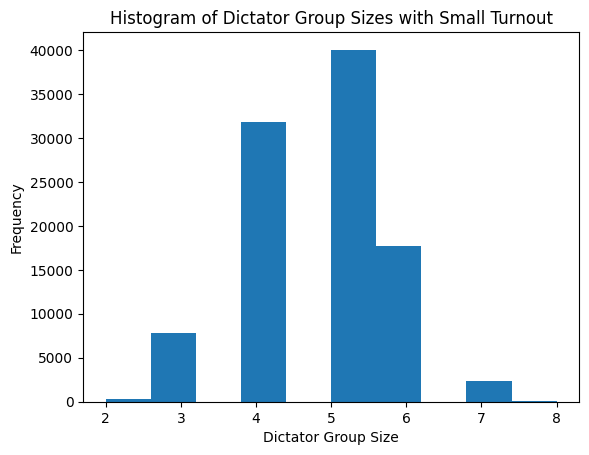

In [29]:
import matplotlib.pyplot as plt

plt.hist(small_turnout_dictator_group_sizes, bins=10)
plt.xlabel('Dictator Group Size')
plt.ylabel('Frequency')
plt.title('Histogram of Dictator Group Sizes with Small Turnout')
plt.show()


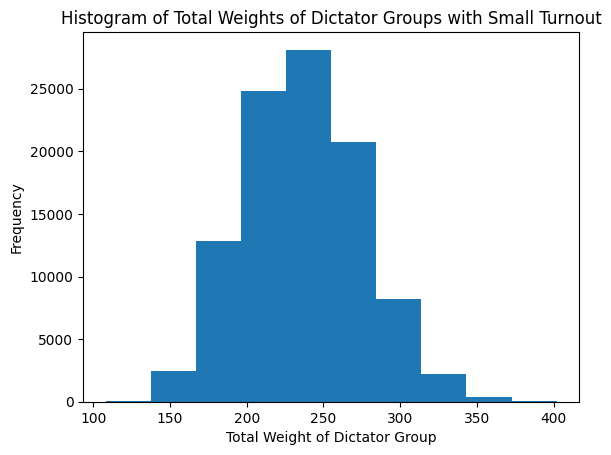

In [30]:
small_turnout_dictator_group_weights = [sum_voter_weights(group) for group in small_turnout_dictator_group_makeups]
import matplotlib.pyplot as plt

plt.hist(small_turnout_dictator_group_weights, bins=10)
plt.xlabel('Total Weight of Dictator Group')
plt.ylabel('Frequency')
plt.title('Histogram of Total Weights of Dictator Groups with Small Turnout')
plt.show()


In [31]:
MEDIUM_TURNOUT_MIN_PCT = 0.15
MEDIUM_TURNOUT_MAX_PCT = 0.20

medium_turnout_dictator_group_sizes, medium_turnout_dictator_group_makeups = analyze_dictator_groups(weighted_voters = voter_weights_dict,
                                                                                                   min_turnout_pct = MEDIUM_TURNOUT_MIN_PCT,
                                                                                                   max_turnout_pct = MEDIUM_TURNOUT_MAX_PCT,
                                                                                                   num_trials = 100_000,
                                                                                                   num_candidates = 4)

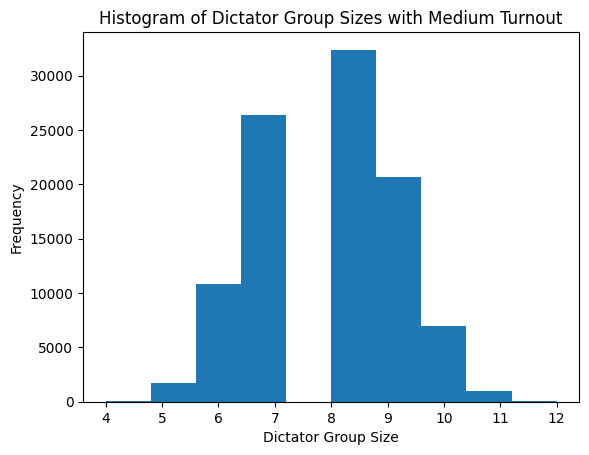

In [32]:
plt.hist(medium_turnout_dictator_group_sizes, bins=10)
plt.xlabel('Dictator Group Size')
plt.ylabel('Frequency')
plt.title('Histogram of Dictator Group Sizes with Medium Turnout')
plt.show()

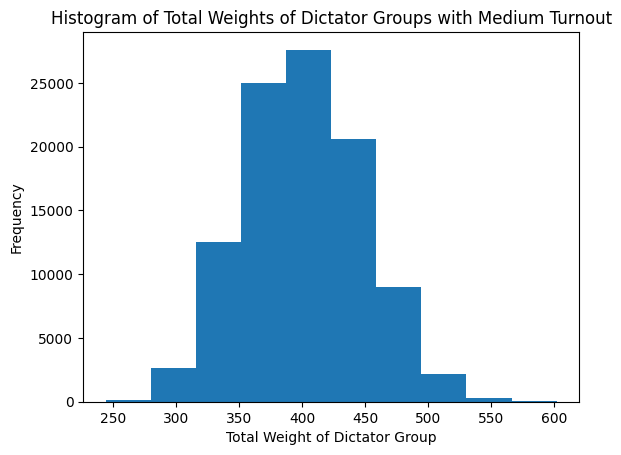

In [33]:
medium_turnout_dictator_group_weights = [sum_voter_weights(group) for group in medium_turnout_dictator_group_makeups]

plt.hist(medium_turnout_dictator_group_weights, bins=10)
plt.xlabel('Total Weight of Dictator Group')
plt.ylabel('Frequency')
plt.title('Histogram of Total Weights of Dictator Groups with Medium Turnout')
plt.show()

In [34]:
LARGE_TURNOUT_MIN_PCT = 0.30
LARGE_TURNOUT_MAX_PCT = 0.45

large_turnout_dictator_group_sizes, large_turnout_dictator_group_makeups = analyze_dictator_groups(weighted_voters = voter_weights_dict,
                                                                                                   min_turnout_pct = LARGE_TURNOUT_MIN_PCT,
                                                                                                   max_turnout_pct = LARGE_TURNOUT_MAX_PCT,
                                                                                                   num_trials = 100_000,
                                                                                                   num_candidates = 4)

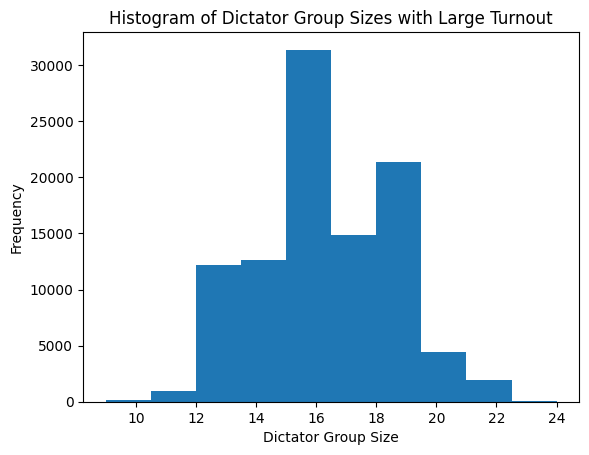

In [35]:
plt.hist(large_turnout_dictator_group_sizes, bins=10)
plt.xlabel('Dictator Group Size')
plt.ylabel('Frequency')
plt.title('Histogram of Dictator Group Sizes with Large Turnout')
plt.show()

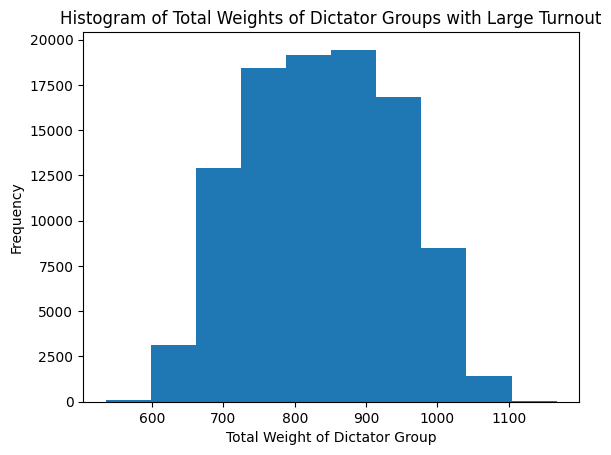

In [36]:
large_turnout_dictator_group_weights = [sum_voter_weights(group) for group in large_turnout_dictator_group_makeups]

plt.hist(large_turnout_dictator_group_weights, bins=10)
plt.xlabel('Total Weight of Dictator Group')
plt.ylabel('Frequency')
plt.title('Histogram of Total Weights of Dictator Groups with Large Turnout')
plt.show()

## Requirement 3: Sybil Resistance, or the Swifty Number

In [37]:
self_mint_NFTs = [2,4,6,8,10,21,25,28,29]

In [38]:
total_weight = sum(default_weights_dict.get(f"tokenId {nft}", 0) for nft in self_mint_NFTs)
print("Total weight of self-mint NFTs:", total_weight)


Total weight of self-mint NFTs: 68


In [39]:
default_weights_dict.get("tokenId 2")

7

In [40]:
def calculate_swifty_number(voter_weights, established_nft_weight):
    total_weight = sum_voter_weights(voter_weights)
    newcomers_needed = math.ceil(total_weight / established_nft_weight)  # ceiling division to get the minimum number of newcomers needed
    return newcomers_needed


In [41]:
def analyze_swifty_numbers(weighted_voters, 
                           min_turnout_pct, 
                           max_turnout_pct, 
                           num_trials,
                           established_nft_weight):
    swifty_numbers = [0] * num_trials
    
    
    for i in range(num_trials):
        voter_pct = random.uniform(min_turnout_pct, max_turnout_pct)
        voter_turnout = generate_random_voter_turnout(weighted_voters, voter_pct)
        current_swifty_number = calculate_swifty_number(voter_turnout, established_nft_weight)
        swifty_numbers[i] = current_swifty_number
    
    return swifty_numbers


In [42]:
small_turnout_swifty_numbers = analyze_swifty_numbers(weighted_voters = voter_weights_dict,
                                                      min_turnout_pct = SMALL_TURNOUT_MIN_PCT,
                                                      max_turnout_pct = SMALL_TURNOUT_MAX_PCT,
                                                      num_trials = 100_000,
                                                      established_nft_weight = default_weights_dict.get("tokenId 2"))


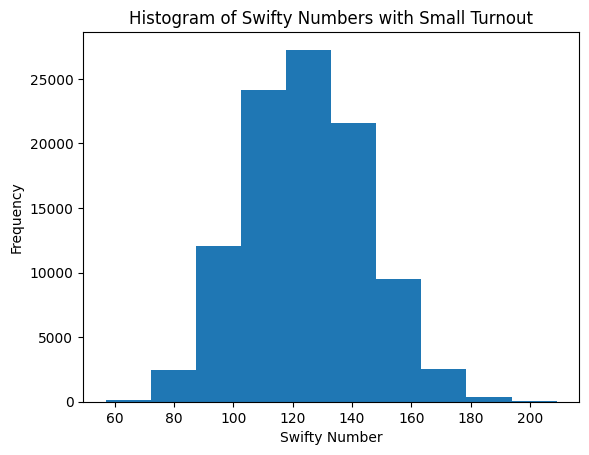

In [43]:
plt.hist(small_turnout_swifty_numbers, bins=10)
plt.xlabel('Swifty Number')
plt.ylabel('Frequency')
plt.title('Histogram of Swifty Numbers with Small Turnout')
plt.show()